In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

vaccinations_df = pd.read_csv("dataset_final.csv")
vaccinations_df["iso_code"].value_counts()

NOR    216
LVA    215
DNK    201
LIE    195
SVN    192
SWE    192
AUT    192
CZE    192
LTU    192
PRT    192
EST    192
ITA    192
FRA    191
ROU    191
GRC    191
DEU    191
BEL    191
POL    191
BGR    190
LUX    189
HRV    188
FIN    188
IRL    187
ISL    185
SVK    184
HUN    184
ESP    183
CYP    182
NLD    178
MLT    170
Name: iso_code, dtype: int64

In [45]:
de_df = vaccinations_df[vaccinations_df["iso_code"] == "AUT"]["people_fully_vaccinated"]
de_df = de_df.reset_index()
de_df = de_df.dropna()
de_df = de_df.drop(columns=["index"])
de_df


,people_fully_vaccinated
20,11.0
21,377.0
22,1268.0
23,2735.0
24,4049.0
...,...
187,3286985.0
188,3337033.0
189,3363244.0
190,3394460.0


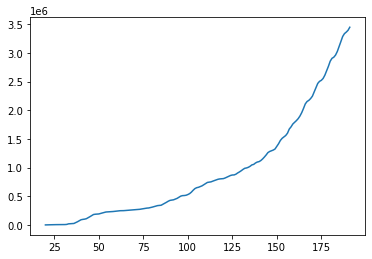

In [46]:
plt.plot(de_df)
plt.show()

In [47]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(de_df, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3639.037, Time=0.34 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3661.699, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3656.619, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3654.500, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3659.842, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3587.476, Time=0.27 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3647.512, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=3561.689, Time=0.24 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=3611.285, Time=0.12 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=3529.811, Time=1.08 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3548.767, Time=0.67 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=3528.787, Time=1.17 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=3540.039, Time=1.17 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=3516.755, Time=1.03 sec
 ARIMA(2,2,3)(0,0,0)[0]          

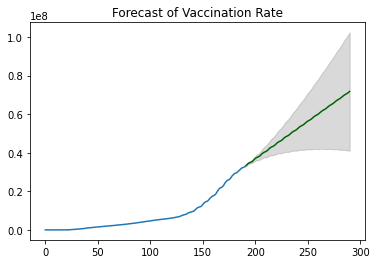

In [ ]:
n_periods = 100
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(de_df), len(de_df)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(de_df)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.show()

In [55]:
def forecasting(country_code):
    dataframe = vaccinations_df[vaccinations_df["iso_code"] == country_code]
    fully_vaccinated = dataframe["people_fully_vaccinated"]
    # fully_vaccinated = fully_vaccinated.dropna()

    fully_vaccinated = fully_vaccinated.reset_index()
    fully_vaccinated = fully_vaccinated.drop(columns=["index"])
    fully_vaccinated.index = vaccinations_df[vaccinations_df["iso_code"] == country_code]["date"]
    fully_vaccinated = fully_vaccinated.dropna()

    

    model = pm.auto_arima(fully_vaccinated, start_p=1, start_q=1,
    test='adf', # use adftest to find optimal 'd'
    max_p=3, max_q=3, # maximum p and q
    m=1, # frequency of series
    d=None, # let model determine 'd'
    seasonal=False, # No Seasonality
    start_P=0,
    D=0,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True)
    #print(model.summary())

    n_periods = 30
    fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = np.arange(len(fully_vaccinated), len(fully_vaccinated)+n_periods)

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.plot(fully_vaccinated)
    plt.plot(fc_series, color='darkgreen')
    plt.fill_between(lower_series.index,
    lower_series,
    upper_series,
    color='k', alpha=.15)
    plt.title("Forecast of Vaccination Rate")
    plt.show()

In [58]:
countries = vaccinations_df["iso_code"].unique()
countries

array(['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN',
       'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'LVA', 'LIE',
       'LTU', 'LUX', 'MLT', 'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'SVK',
       'SVN', 'ESP', 'SWE'], dtype=object)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=4223.330, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4262.199, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4262.417, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=4257.670, Time=0.01 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4260.261, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=4217.008, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4262.632, Time=0.01 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=4191.614, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4235.039, Time=0.04 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=4169.139, Time=0.24 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=4233.630, Time=0.13 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=4167.617, Time=0.36 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=4204.177, Time=0.12 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=4162.531, Time=0.28 sec
 ARIMA(2,2,3)(0,0,0)[0]          

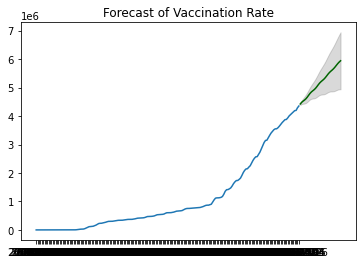

In [57]:
for i in range(4):
    forecasting(countries[i])